In [4]:
import pandas as pd
import numpy as np
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix

ModuleNotFoundError: No module named 'tensorflow'

**Versions of Packages**

In [156]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn_version)
print("TensorFlow version:", tf.__version__)
#unable to find the version for pretty_conf_matrix, but maybe only one of us runs it?

Pandas version: 1.4.4
NumPy version: 1.21.5
Scikit-learn version: 1.0.2
TensorFlow version: 2.10.0


In [1]:
#import pre-processed data from pickle 
year = 2010
file_path = "/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/"
file_path_2 = "_final_rnn.pickle"

df_10= pd.read_pickle(file_path + year + file_path_2)
#df_09= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2009_text_wo_names.pickle")
#df_11= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2011_text_wo_names.pickle")
#df_12= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2012_text_wo_names.pickle")
#df_13= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2013_text_wo_names.pickle")
#df_14= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2014_text_wo_names.pickle")
#df_15= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2015_text_wo_names.pickle")
#df_16= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2016_text_wo_names.pickle")
#df_17= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2017_text_wo_names.pickle")
#df_18= pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2018_text_wo_names.pickle")
#df_19 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2019_text_wo_names.pickle")
#df_20 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2020_text_wo_names.pickle")
#df_21 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2021_text_wo_names.pickle")
#df_22 = pd.read_pickle(r"/Users/yolandaferreirofranchi/Desktop/ThesisDatasets/2022_text_wo_names_(1).pickle")
df_10

NameError: name 'pd' is not defined

In [3]:
def absolute_count(male_col, female_col):
    if female_col > male_col and male_col == 0:
        return 1
    elif male_col> female_col and female_col ==0: 
        return 0
    else: 
        return None

In [4]:
#apply function to only get rows with an absolute count 
df_10['col_type'] = df_10.apply(lambda row: absolute_count(row['male_count'], row['female_count']),axis=1)

#remove nulls 
df_10 = df_10[df_10["col_type"].notnull()]

#DOC: number of male and female columns
df_10["col_type"].value_counts()  

0.0    378476
1.0    113870
Name: col_type, dtype: int64

**Split the DF**

In [5]:
# Split the df by the preprocessed 
x_train, x_test, y_train, y_test = train_test_split(df_10["pre_processed_sent"], 
                                                    df_10["col_type"], 
                                                    stratify = df_10["col_type"])

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(df_10["string_rnn"],
                                                df_10["col_type"], 
                                                stratify = df_10["col_type"])

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((xTrain, yTrain)) #string_rnn here 
test_dataset = tf.data.Dataset.from_tensor_slices((xTest, yTest)) #clean text 
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [8]:
for example, gen_label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', gen_label.numpy())

text:  b'say hop may financially challenge usual something positive may come'
label:  0.0


In [9]:
buffer_size = 10000 #take first 10,000 tweets
batch_size = 64 #batch size that leads to highest accuracy (best practice)
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [10]:
#map text features to integer sequences for all of the vocabulary
vocab_size = 100000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [20]:
vocab = np.array(encoder.get_vocabulary())
vocab_dict = dict(enumerate(vocab))
#vocab_dict

{0: '',
 1: '[UNK]',
 2: 'say',
 3: 'year',
 4: 'would',
 5: 'tell',
 6: 'take',
 7: 'add',
 8: 'one',
 9: 'also',
 10: 'make',
 11: 'old',
 12: 'people',
 13: 'two',
 14: 'go',
 15: 'police',
 16: 'work',
 17: 'time',
 18: 'get',
 19: 'find',
 20: 'could',
 21: 'give',
 22: 'family',
 23: 'want',
 24: 'court',
 25: 'die',
 26: 'see',
 27: 'think',
 28: 'home',
 29: 'come',
 30: 'arrest',
 31: 'know',
 32: 'government',
 33: 'first',
 34: 'new',
 35: 'life',
 36: 'last',
 37: 'day',
 38: 'use',
 39: 'three',
 40: 'leave',
 41: 'call',
 42: 'hospital',
 43: 'back',
 44: 'charge',
 45: 'child',
 46: 'month',
 47: 'attack',
 48: 'help',
 49: 'like',
 50: 'believe',
 51: 'need',
 52: 'death',
 53: 'show',
 54: 'way',
 55: 'car',
 56: 'later',
 57: 'report',
 58: 'try',
 59: 'country',
 60: 'look',
 61: 'service',
 62: 'many',
 63: 'week',
 64: 'public',
 65: 'party',
 66: 'area',
 67: 'part',
 68: 'release',
 69: 'become',
 70: 'include',
 71: 'kill',
 72: 'claim',
 73: 'ask',
 74: 'face',

**RNN/LSTM Architecture**

In [12]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          2752000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #maybe change to BinaryCrossentropy
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs=1,
                    validation_data=test_dataset)

5770/5770 [==============================] - 204s 34ms/step - loss: 0.5012 - accuracy: 0.7794 - val_loss: 0.4737 - val_accuracy: 0.7884


In [ ]:
#type(test_dataset)

**Confusion Matrix**

In [17]:
# Convert y_true and y_pred to numpy arrays
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_pred = np.concatenate([model.predict(x).argmax(axis=-1) for x, _ in test_dataset], axis=0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


1/1 [==============================] - 2s 2s/step
[[92338  2281]
 [23760  4708]]


In [120]:
type(cm)

numpy.ndarray

In [128]:
data

,0,1
0,92338,2281
1,23760,4708


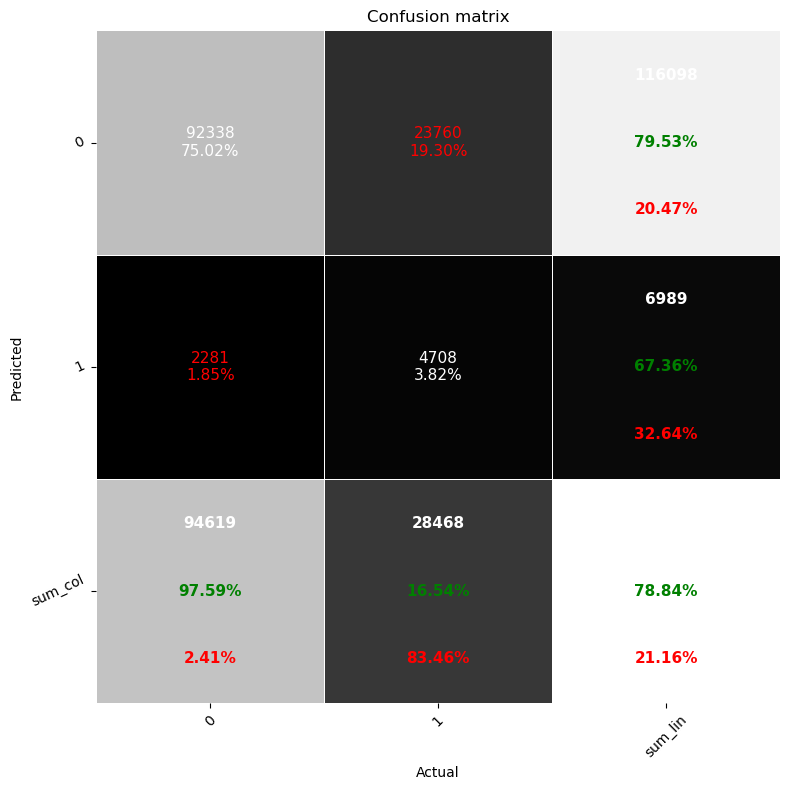

In [127]:
#make a cute confusion matrix 
data = pd.DataFrame(cm)
cmap = 'gray' #to change palette, look up cmap palettes
pp_matrix(data, cmap=cmap)

**Coefficient Analysis**

In [132]:
# Get the feature weights
weights = model.layers[1].get_weights()[0]

# Sort the feature weights
sorted_weights = np.sort(weights, axis=0)[::-1]

# Select the top 1000 features
top_features = sorted_weights[:1000]

# Select the bottom 1000 features
bottom_features = sorted_weights[-1000:]

vocab_dict = dict(enumerate(vocab))

# Map the features back to words
#top_words = [word for word, idx in sorted(vocab_dict.items(), key=lambda x: weights[int(x[1])] if (x[1] != "" and x[0] != "[UNK]") else 0, reverse=True)[:1000]]
#bottom_words = [word for word, idx in sorted(vocab_dict.items(), key=lambda x: weights[int(x[1])] if x[1] != "" and x[0] != "[UNK]" else 0, reverse=False)[:1000]]

top_words = vocab[np.argsort(weights[:,::-1])[:1000]]
bottom_words = vocab[np.argsort(weights)][:1000]


# Print the top and bottom features
print("Top features:")#, top_words, type(top_features))
s1h = pd.Series(top_words.ravel(), name='words') #ravel() to flatten 
s2h= pd.Series(top_features.ravel(), name='weights')
df_high = pd.concat([s1h, s2h], axis = 1)
#df_high 

print("Bottom features:")#, top_words, type(top_features))
s1l = pd.Series(bottom_words.ravel(), name='words') #ravel() to flatten 
s2l= pd.Series(bottom_features.ravel(), name='weights')
df_low = pd.concat([s1l, s2l], axis = 1)
df_low

Top features:
Bottom features:


,words,weights
0,say,-0.051578
1,day,-0.046775
2,three,-0.053626
3,week,-0.055448
4,add,-0.055803
...,...,...
63995,day,-0.090687
63996,service,-0.091394
63997,week,-0.111118
63998,show,-0.101092


In [131]:
#sort highest
df_sorted_h = df_high.sort_values(by = "weights", ascending=False)
df_sorted_h.head(50)

,words,weights
59,take,0.137969
7,arrest,0.136017
20,[UNK],0.133468
58,need,0.131816
43,die,0.126689
29,find,0.124858
24,go,0.122599
42,call,0.120471
3,,0.119124
37,report,0.119079


In [135]:
#sort lowest
df_sorted_l = df_low.sort_values(by = "weights", ascending=True)
df_sorted_l.head(50)

,words,weights
63946,one,-0.141381
63951,home,-0.135479
63961,go,-0.135288
63942,look,-0.133346
63937,could,-0.130692
63944,take,-0.130315
63969,work,-0.124041
63959,report,-0.122399
63987,child,-0.122271
63947,find,-0.122174


**Word Cloud**

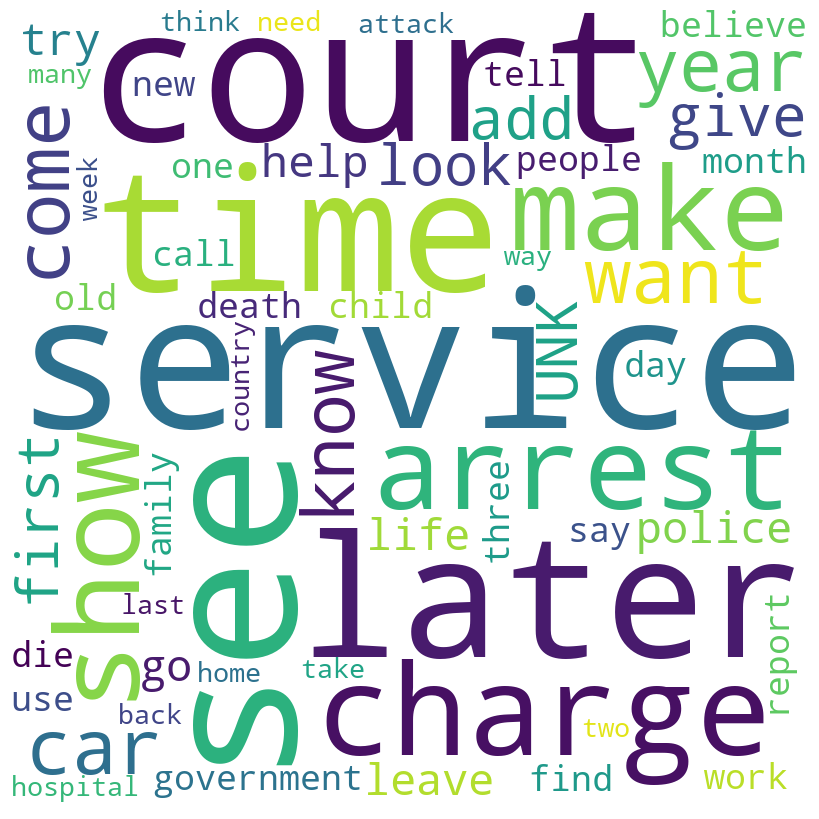

In [145]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df_high['words'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()